In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# data cleaning and processing

In [4]:
df = pd.read_csv('multiple sclerosis disease.csv')
df.head(10)

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
5,1,29,22.0,1,1,6.0,2,0,1,0,0,0,1,0,1,0,1.0,1.0,1
6,2,53,20.0,1,1,14.0,2,0,1,0,1,0,1,1,0,1,1.0,1.0,1
7,2,24,15.0,1,1,14.0,2,0,1,1,0,0,1,1,1,1,2.0,2.0,1
8,1,36,15.0,1,1,8.0,2,0,1,1,1,0,1,0,0,0,1.0,1.0,1
9,2,28,20.0,1,1,8.0,2,0,0,0,0,0,1,0,1,0,1.0,1.0,1


In [5]:
df.shape

(273, 19)

In [6]:
df.isna().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [7]:
null_num_columns = ['Schooling', 'Initial_Symptom', 'Initial_EDSS', 'Final_EDSS']
for col in null_num_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
df.isna().sum()

Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
Initial_EDSS               0
Final_EDSS                 0
group                      0
dtype: int64

In [9]:
df.shape

(273, 19)

In [10]:
df.dtypes

Gender                       int64
Age                          int64
Schooling                  float64
Breastfeeding                int64
Varicella                    int64
Initial_Symptom            float64
Mono_or_Polysymptomatic      int64
Oligoclonal_Bands            int64
LLSSEP                       int64
ULSSEP                       int64
VEP                          int64
BAEP                         int64
Periventricular_MRI          int64
Cortical_MRI                 int64
Infratentorial_MRI           int64
Spinal_Cord_MRI              int64
Initial_EDSS               float64
Final_EDSS                 float64
group                        int64
dtype: object

**Group: 1=CDMS, 2=non-CDMS**

In [11]:
df['group'].value_counts()

group
2    148
1    125
Name: count, dtype: int64

In [12]:
features = ['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS']

<Axes: >

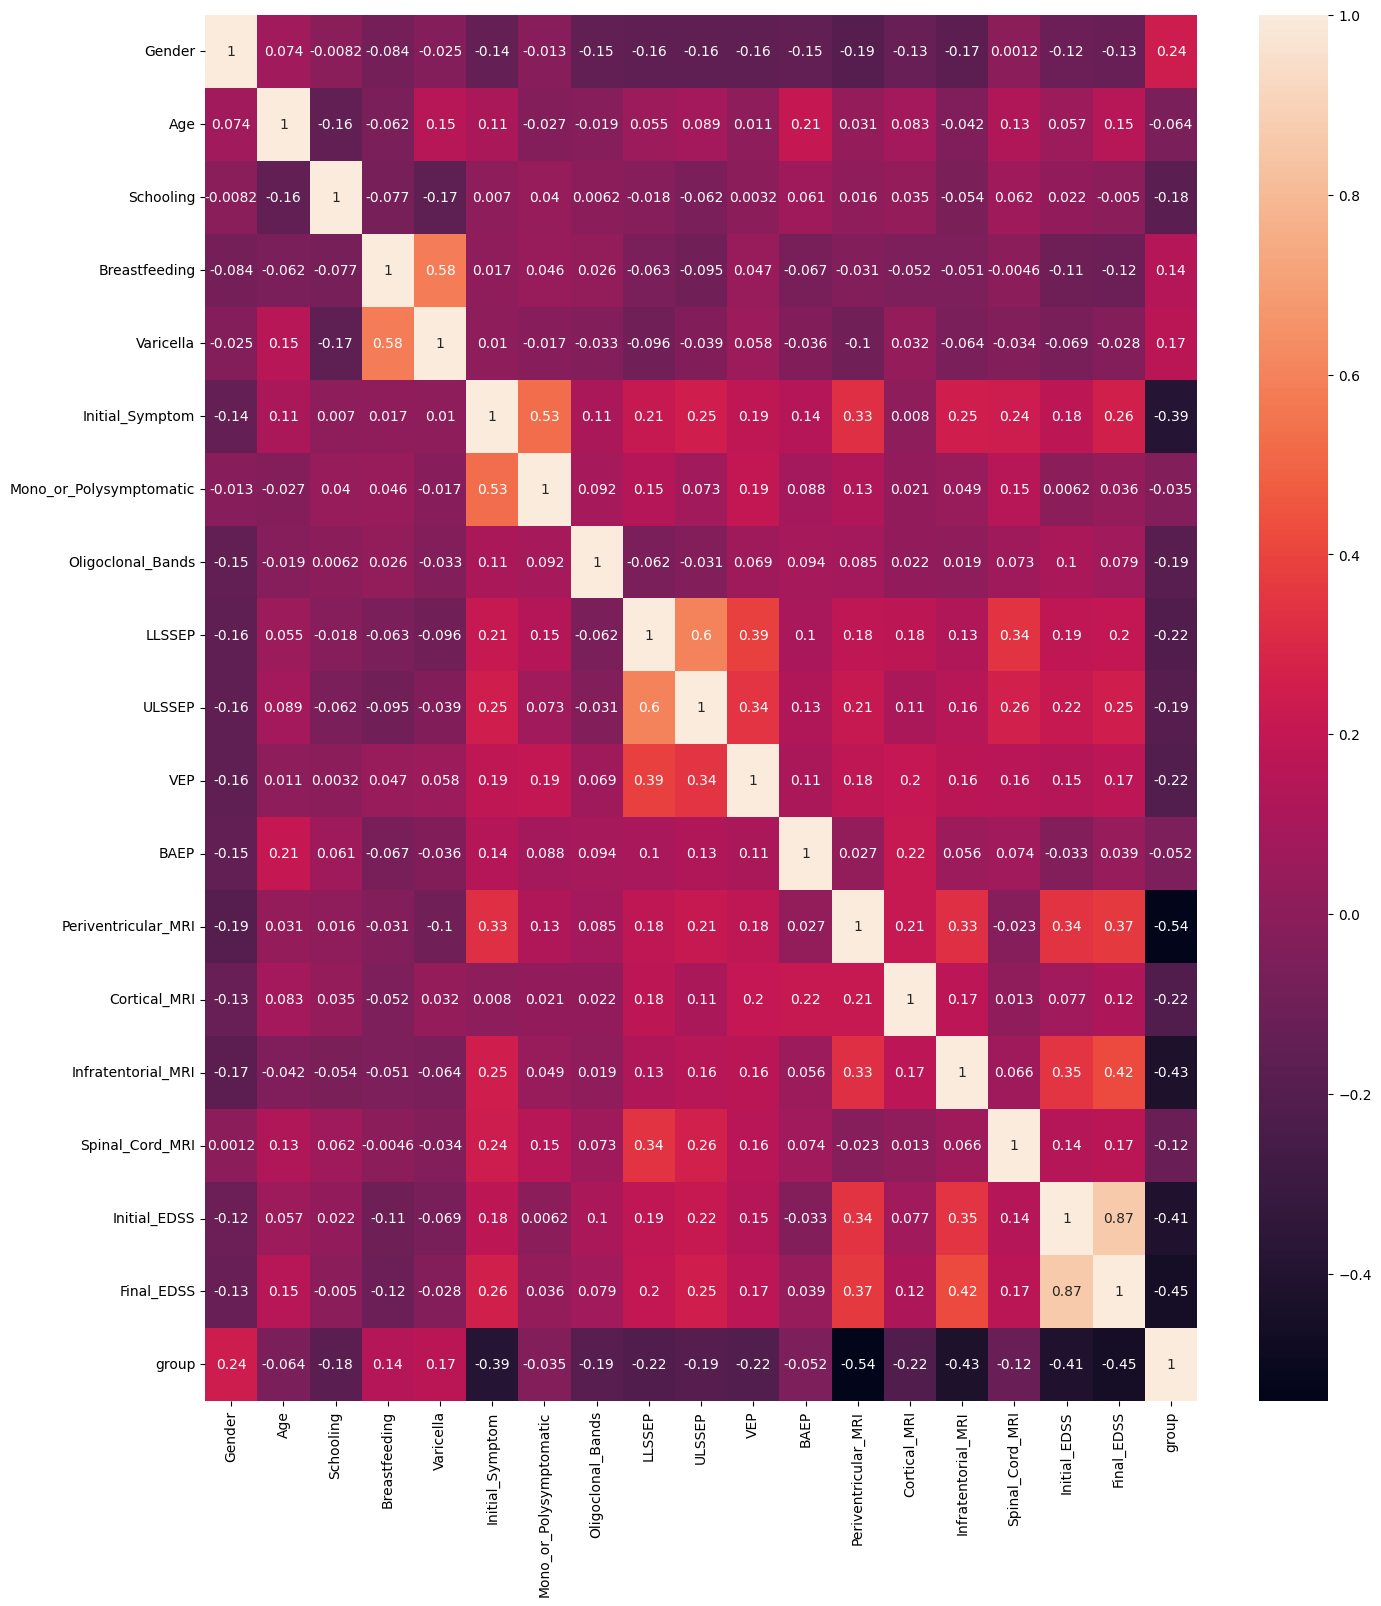

In [13]:
plt.figure(figsize=(16,18))
c=df.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)

In [92]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.85)

In [93]:
X_train = train[features]
Y_train = train['group']

X_test = test[features]
Y_test = test['group']

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [95]:
model = RandomForestClassifier(n_estimators = 75)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=75)

In [96]:

model.score(X_test, Y_test)

0.9024390243902439

In [97]:
Y_pred = model.predict(X_test)
print(Y_pred)

[2 2 2 2 1 2 1 2 2 1 1 2 2 1 2 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1 2
 1 2 1 1]


In [28]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[26,  9],
       [10, 37]])

Text(95.72222222222221, 0.5, 'real')

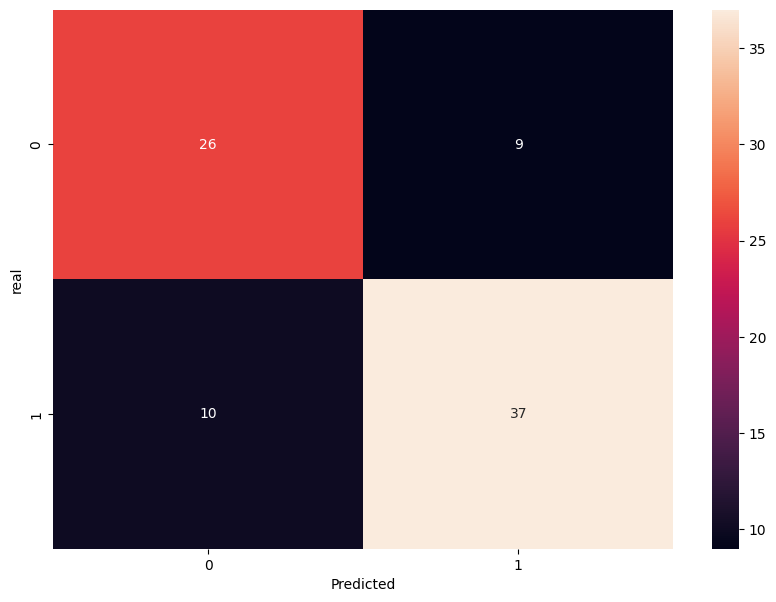

In [29]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [98]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  90.24 %,  37.0 correct detections
Inaccuracy:  9.76 %,  4.0 Incorrect detections


In [99]:
df.loc[5]

Gender                      1.0
Age                        29.0
Schooling                  22.0
Breastfeeding               1.0
Varicella                   1.0
Initial_Symptom             6.0
Mono_or_Polysymptomatic     2.0
Oligoclonal_Bands           0.0
LLSSEP                      1.0
ULSSEP                      0.0
VEP                         0.0
BAEP                        0.0
Periventricular_MRI         1.0
Cortical_MRI                0.0
Infratentorial_MRI          1.0
Spinal_Cord_MRI             0.0
Initial_EDSS                1.0
Final_EDSS                  1.0
group                       1.0
Name: 5, dtype: float64

In [100]:
input_data = (1.0, 29.0, 22.0, 1.0, 1.0, 6.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
#print(prediction)

if prediction == [1]:
  print("Clinically definite multiple sclerosis(CDMS)")
else:
  print("Non clinically definite multiple sclerosis(NCDMS)")

Clinically definite multiple sclerosis(CDMS)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [104]:
import pickle

In [105]:
filename = 'multiple sclerosis disease.sav'
pickle.dump(model, open(filename, 'wb'))

In [106]:
for columns in df.columns:
  print(columns)

Gender
Age
Schooling
Breastfeeding
Varicella
Initial_Symptom
Mono_or_Polysymptomatic
Oligoclonal_Bands
LLSSEP
ULSSEP
VEP
BAEP
Periventricular_MRI
Cortical_MRI
Infratentorial_MRI
Spinal_Cord_MRI
Initial_EDSS
Final_EDSS
group
